# Multimodal Lumbar Spine Degenerative Classification 

## Libs

In [40]:
import pandas as pd
import pydicom
import matplotlib.pyplot as plt
import os
import glob
from tqdm import tqdm
from matplotlib.patches import Circle
import math

In [53]:
base_data = pd.read_csv("/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train.csv")
base_data.head(5)

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,...,left_subarticular_stenosis_l1_l2,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1
0,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1,4646740,Normal/Mild,Normal/Mild,Moderate,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Moderate,Moderate,Moderate,Normal/Mild
2,7143189,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
3,8785691,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
4,10728036,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild


In [20]:
### This is the most most important and joining linkage of the whole dataset, this is exactlty what we are working on regenerating
label_data = pd.read_csv('/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_label_coordinates.csv')

path_list = []
for study_id, series_id, instance_number in zip(label_data['study_id'], label_data['series_id'], label_data['instance_number']):
    path_list.append(f'/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images/{study_id}/{series_id}/{instance_number}.dcm')

label_data['dcm_path'] = path_list
label_data.head(5)

,study_id,series_id,instance_number,condition,level,x,y,dcm_path
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,/kaggle/input/rsna-2024-lumbar-spine-degenerat...
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286,/kaggle/input/rsna-2024-lumbar-spine-degenerat...
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182,/kaggle/input/rsna-2024-lumbar-spine-degenerat...
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434,/kaggle/input/rsna-2024-lumbar-spine-degenerat...
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602,/kaggle/input/rsna-2024-lumbar-spine-degenerat...


In [54]:
merged_df = pd.merge(base_data, label_data, on='study_id', how='inner')
merged_df.head()

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,...,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1,series_id,instance_number,condition,level,x,y,dcm_path
0,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,/kaggle/input/rsna-2024-lumbar-spine-degenerat...
1,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286,/kaggle/input/rsna-2024-lumbar-spine-degenerat...
2,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182,/kaggle/input/rsna-2024-lumbar-spine-degenerat...
3,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434,/kaggle/input/rsna-2024-lumbar-spine-degenerat...
4,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602,/kaggle/input/rsna-2024-lumbar-spine-degenerat...


In [8]:
description_data = pd.read_csv("/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_series_descriptions.csv")
description_data.head(5)

,study_id,series_id,series_description
0,4003253,702807833,Sagittal T2/STIR
1,4003253,1054713880,Sagittal T1
2,4003253,2448190387,Axial T2
3,4646740,3201256954,Axial T2
4,4646740,3486248476,Sagittal T1


## Human Annotated Degeneration/Spinal Stenosis

In [60]:
import pydicom
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import math

condition_colors = {
    'Spinal Canal Stenosis': 'red',
    'Right Neural Foraminal Narrowing': 'orange',
    'Left Neural Foraminal Narrowing': 'green',
    'Left Subarticular Stenosis': 'yellow',
    'Right Subarticular Stenosis': 'white'
}

def display_mri_with_circles(ax, dcm_path, coordinates, conditions):
    dcm = pydicom.dcmread(dcm_path)
    img = dcm.pixel_array
    
    ax.imshow(img, cmap='gray')
    
    for (x, y, condition) in zip(coordinates['x'], coordinates['y'], conditions):
        color = condition_colors.get(condition, 'white')
        circle = Circle((x, y), 10, color=color, fill=False, linewidth=1)
        ax.add_patch(circle)
    
    ax.axis('off')

def display_images_in_grid(label_data, study_id):
    selected_data = label_data[label_data['study_id'] == study_id]
    grouped = selected_data.groupby('dcm_path').agg(list).reset_index()

    num_images = len(grouped)
    if num_images == 0:
        print(f"No images found for study_id: {study_id}")
        return
    
    grid_cols = math.ceil(math.sqrt(num_images))
    grid_rows = math.ceil(num_images / grid_cols)
    
    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(10, 10))
    
    axes = axes.flatten() if num_images > 1 else [axes]
    
    for idx, (ax, row) in enumerate(zip(axes, grouped.iterrows())):
        dcm_path = row[1]['dcm_path']
        coordinates = {'x': row[1]['x'], 'y': row[1]['y']}
        conditions = row[1]['condition']
        
        display_mri_with_circles(ax, dcm_path, coordinates, conditions)
    
    for ax in axes[idx + 1:]:
        ax.axis('off')
    
    handles = [Circle((0, 0), 10, color=color, fill=False) for condition, color in condition_colors.items()]
    labels = list(condition_colors.keys())
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.1, 1), fontsize='small')
    
    plt.tight_layout()
    plt.show()

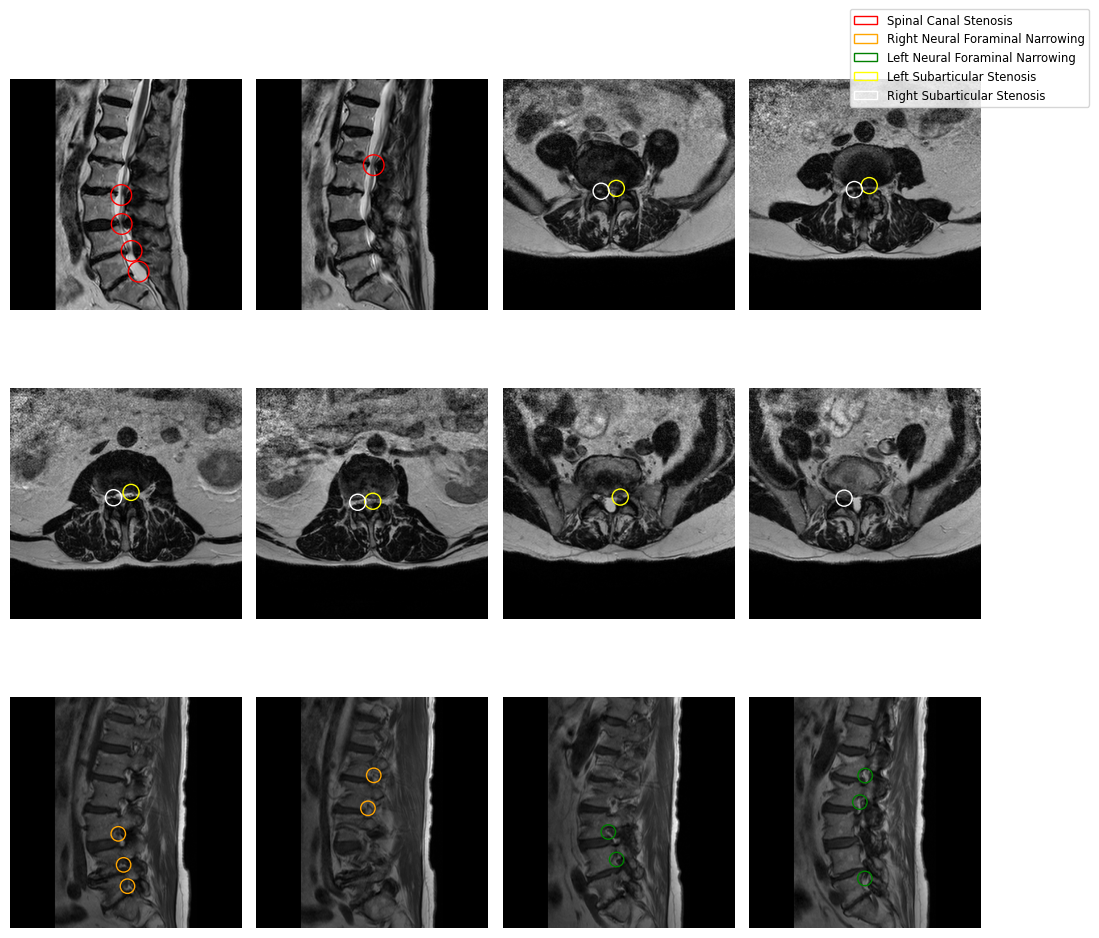

In [61]:
display_images_in_grid(label_data, study_id=1009905322)